<a href="https://colab.research.google.com/github/ChahineBA/British-Airways-Virtual-Internship/blob/main/Customer_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization based on Matplotlib

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings to avoid cluttering the output

In [2]:
import chardet

# Detect encoding
with open('/content/customer_booking.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Read the file with the detected encoding
df = pd.read_csv('/content/customer_booking.csv', encoding=result['encoding'])


In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
# Display a concise summary of the DataFrame
df.info()

# Explanation of the output:
# - The output will show the following:
#   - The total number of entries (rows) in the DataFrame
#   - The number of columns and their names
#   - The data type of each column (e.g., int64, float64, object)
#   - The number of non-null (non-missing) values in each column
#   - The memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
# Check for null values
null_counts = df.isnull().sum()
print(null_counts)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [ ]:
# Iterate through each column in the DataFrame
for column in df.columns:
    # Get the unique values for the current column
    unique_values = df[column].unique()

    # Print the column name and its unique values
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("-----------------------------------------------------------------------")

Unique values in column 'num_passengers':
[2 1 3 4 6 5 7 9 8]
-----------------------------------------------------------------------
Unique values in column 'sales_channel':
['Internet' 'Mobile']
-----------------------------------------------------------------------
Unique values in column 'trip_type':
['RoundTrip' 'CircleTrip' 'OneWay']
-----------------------------------------------------------------------
Unique values in column 'purchase_lead':
[262 112 243  96  68   3 201 238  80 378 185   8 265 245 192 259  19  67
 351 228  21  23  25  16  66  51  37 101   7   5  33  20  56  13  71 346
   9  65 221 107  14  77  24  47  22  11  35 272 250 161 128 190 311  27
 314 102   2  26  32  57 198 120  69 281 282  15  31 316 232 156 196 283
  34  63   6 227 181 138 134  85  93 118  90 168 127  18 153 186 263 172
 230  42  81 140 285 179 341 173 180 366 229 174  82  75 163 105 276 110
  83 154  55  45  54 193  10 166  97 239 182  99  53  28 384  70 126 142
  87  86 313  41  91 206 197 268 1

In [ ]:
df.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


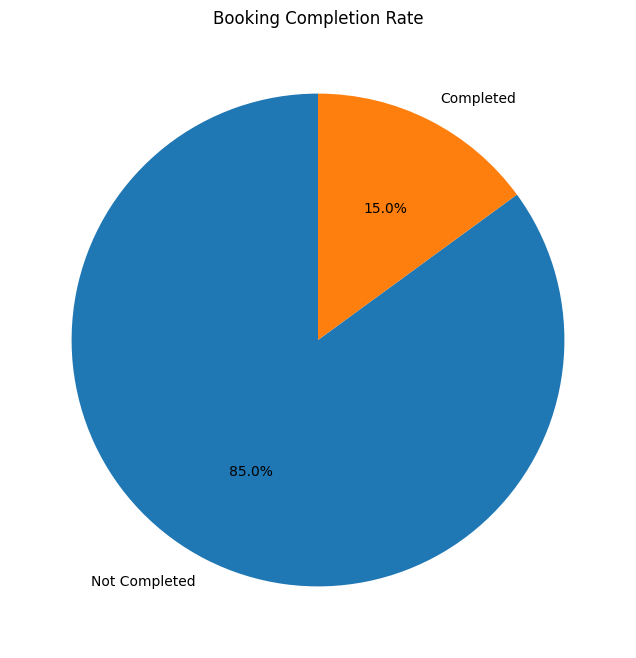

In [5]:
# Count the number of completed and not completed bookings
booking_complete_counts = df['booking_complete'].value_counts()

# Create a pie chart to visualize booking completion rates
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(booking_complete_counts,
        labels=['Not Completed', 'Completed'],  # Labels for the pie slices
        autopct='%1.1f%%',  # Format to display the percentage on the slices
        startangle=90)  # Start the pie chart from a specific angle

# Set the title for the pie chart
plt.title('Booking Completion Rate')

# Display the pie chart
plt.show()


## Data Imbalance in Booking Completion

The dataset exhibits a significant imbalance in the `booking_complete` variable:

- **Not Completed (0)**: 42,522 instances
- **Completed (1)**: 7,478 instances

This disparity suggests that the dataset is unbalanced, with a majority of bookings not completed compared to those that are.

### Proposed Solution: SMOTE

To address this imbalance, we will implement **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE is an effective method for generating synthetic samples from the minority class, thereby helping to balance the dataset and improve the performance of machine learning models.

Using SMOTE will allow us to create a more representative training set, which can enhance the model's ability to learn from both classes effectively.


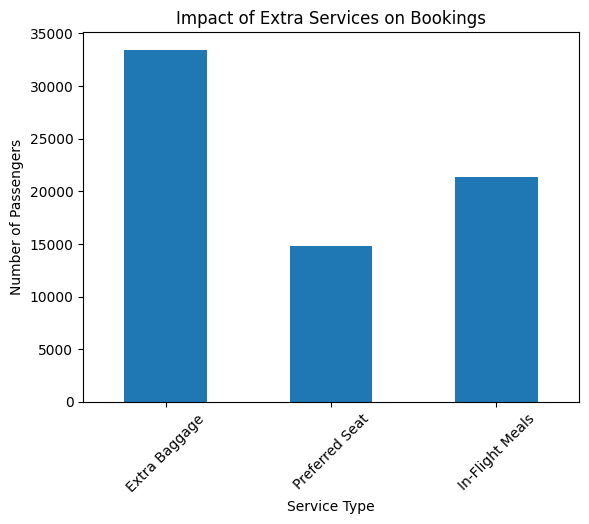

In [6]:
# Calculate the total number of passengers requesting each extra service
extra_services = df[['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']].sum()

# Create a bar plot to visualize the impact of extra services on bookings
extra_services.plot(kind='bar', stacked=True)

# Set the title of the bar chart
plt.title('Impact of Extra Services on Bookings')

# Label the x-axis
plt.xlabel('Service Type')

# Label the y-axis
plt.ylabel('Number of Passengers')

# Set x-ticks and labels, rotating them for better readability
plt.xticks(ticks=[0, 1, 2], labels=['Extra Baggage', 'Preferred Seat', 'In-Flight Meals'], rotation=45)

# Display the bar chart
plt.show()


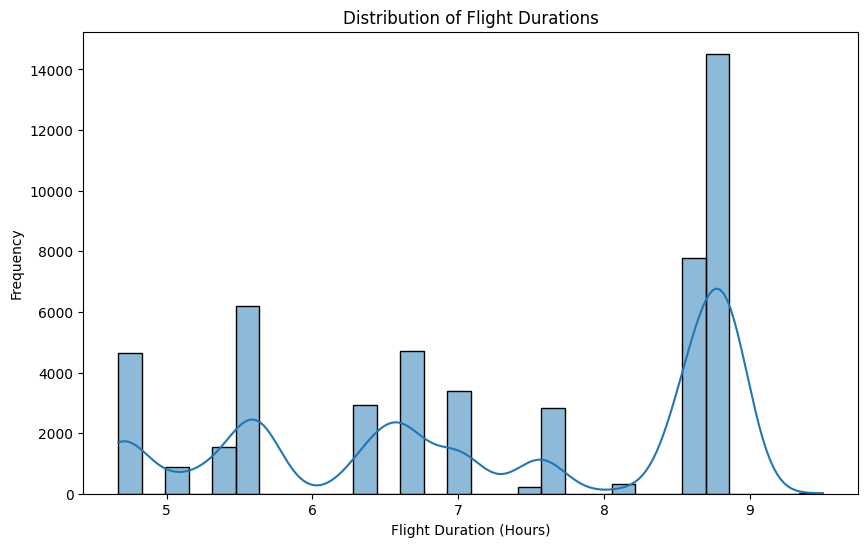

In [7]:
# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Create a histogram of flight durations with a kernel density estimate (KDE)
sns.histplot(df['flight_duration'], bins=30, kde=True)

# Set the title of the histogram
plt.title('Distribution of Flight Durations')

# Label the x-axis
plt.xlabel('Flight Duration (Hours)')

# Label the y-axis
plt.ylabel('Frequency')

# Display the histogram
plt.show()


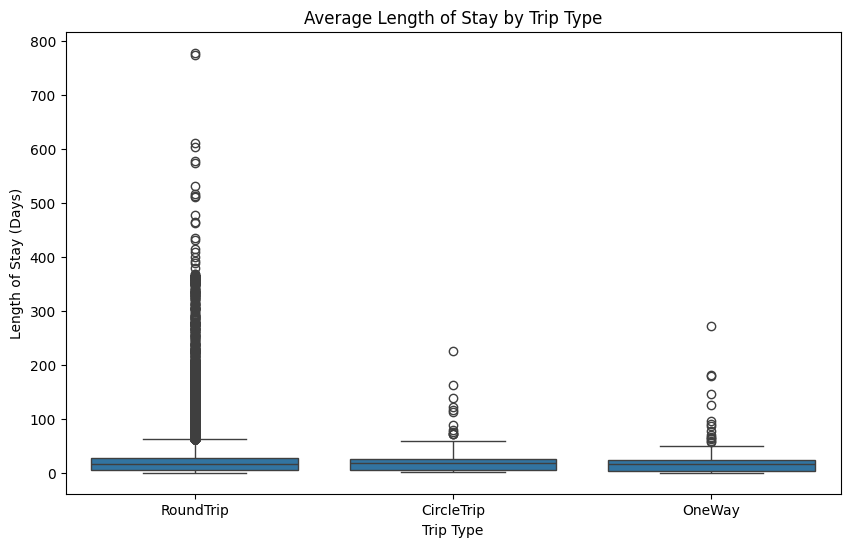

In [8]:
# Set the figure size for the box plot
plt.figure(figsize=(10, 6))

# Create a box plot to visualize the length of stay by trip type
sns.boxplot(data=df, x='trip_type', y='length_of_stay')

# Set the title of the box plot
plt.title('Average Length of Stay by Trip Type')

# Label the x-axis
plt.xlabel('Trip Type')

# Label the y-axis
plt.ylabel('Length of Stay (Days)')

# Display the box plot
plt.show()


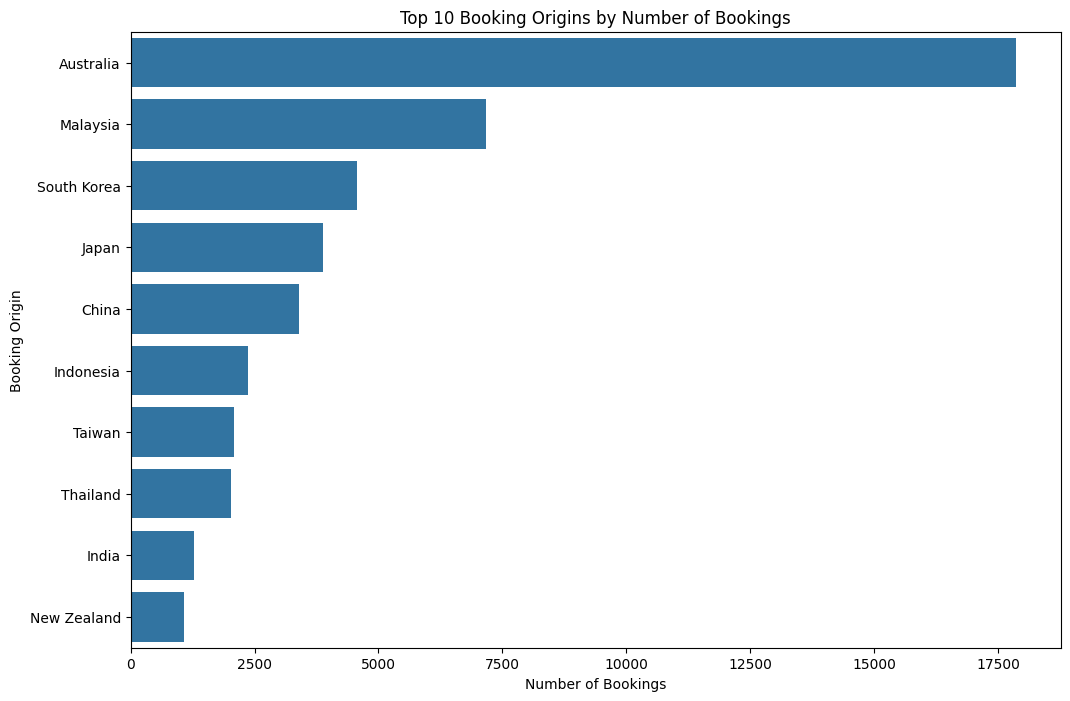

In [17]:
# Set the figure size for the count plot
plt.figure(figsize=(12, 8))

# Get the top 10 booking origins based on count
top_10_booking_origins = df['booking_origin'].value_counts().nlargest(10)

# Create a count plot for the number of bookings by the top 10 booking origins
sns.countplot(data=df[df['booking_origin'].isin(top_10_booking_origins.index)],
                  y='booking_origin',
                  order=top_10_booking_origins.index)

# Set the title and labels for the count plot
plt.title('Top 10 Booking Origins by Number of Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Booking Origin')

# Display the count plot
plt.show()


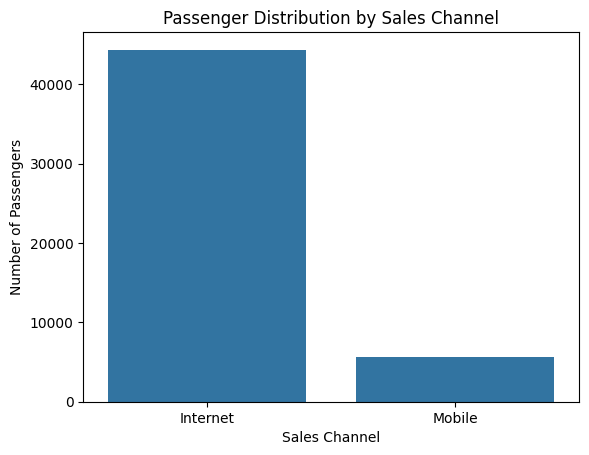

In [9]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For statistical data visualization

# Create a count plot to visualize passenger distribution by sales channel
sns.countplot(data=df, x='sales_channel')

# Set the title of the count plot
plt.title('Passenger Distribution by Sales Channel')

# Label the x-axis
plt.xlabel('Sales Channel')

# Label the y-axis
plt.ylabel('Number of Passengers')

# Display the count plot
plt.show()


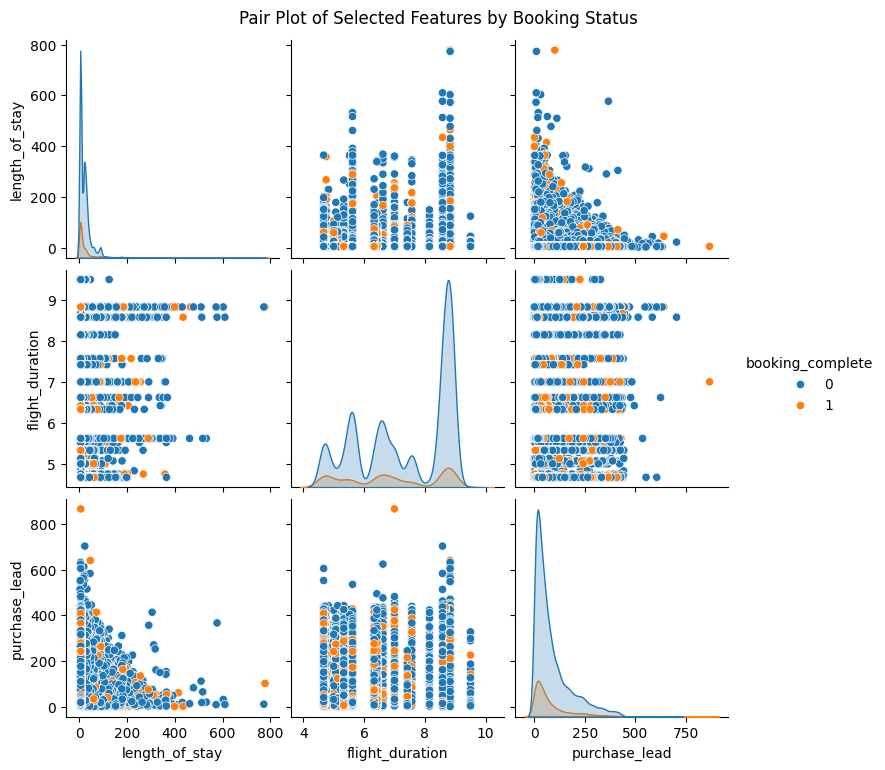

In [12]:
# Create a pair plot for selected numerical features
sns.pairplot(df, vars=['length_of_stay', 'flight_duration', 'purchase_lead'], hue='booking_complete')

# Set the title for the pair plot
plt.suptitle('Pair Plot of Selected Features by Booking Status', y=1.02)

# Display the pair plot
plt.show()


In [ ]:
# Drop the 'booking_complete' column from the DataFrame to create the feature set (X)
X = df.drop('booking_complete', axis=1)

# Assign the 'booking_complete' column as the target variable (y)
y = df.booking_complete

# Convert categorical object columns in the feature set to integer dtype
for colname in X.select_dtypes("object"):
    # Use factorize() to convert each unique category into a numeric code
    X[colname], _ = X[colname].factorize()

In [ ]:
X.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [ ]:
from sklearn.feature_selection import mutual_info_classif  # Import mutual information classifier

# Calculate mutual information scores between each feature in X and the target variable y
mi_scores = mutual_info_classif(X, y)

# Create a Pandas Series to hold the MI scores, indexed by feature names
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

# Sort the MI scores in descending order to identify the most informative features
mi_scores = mi_scores.sort_values(ascending=False)

# Display the mutual information scores for each feature
mi_scores  # Show a few features with their MI scores


,MI Scores
route,0.052367
booking_origin,0.048520
flight_duration,0.016687
wants_extra_baggage,0.012716
length_of_stay,0.009002
wants_in_flight_meals,0.004601
wants_preferred_seat,0.002656
sales_channel,0.002405
purchase_lead,0.001995
flight_day,0.001017


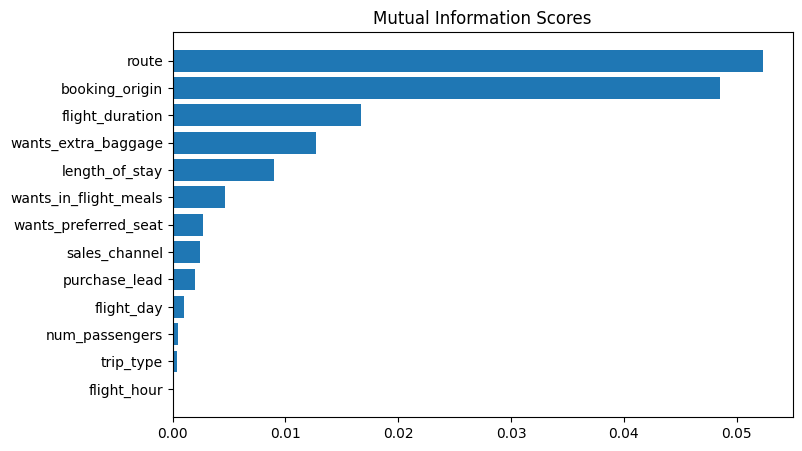

In [ ]:
# Define a function to plot mutual information scores
def plot_mi_scores(scores):
    # Sort the scores in ascending order for better visualization
    scores = scores.sort_values(ascending=True)

    # Create an array for bar positions on the y-axis
    width = np.arange(len(scores))

    # Create a list of feature names for y-ticks
    ticks = list(scores.index)

    # Create a horizontal bar plot for the mutual information scores
    plt.barh(width, scores)

    # Set y-ticks to display feature names
    plt.yticks(width, ticks)

    # Set the title of the plot
    plt.title("Mutual Information Scores")

# Create a figure with specified DPI and size
plt.figure(dpi=100, figsize=(8, 5))

# Call the function to plot the mutual information scores
plot_mi_scores(mi_scores)


In [ ]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Create a function to split the dataset into training, validation, and testing sets
def dataset(X, y):
    # Split the data into training (80%) and validation (20%) sets
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

    # Further split the training data into training (60%) and testing (20%) sets (from the original dataset)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)

    # Return the training, validation, and testing sets
    return (train_X, val_X, train_y, val_y)


In [ ]:
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for feature scaling

# Define a function to scale the features using Min-Max scaling
def scale(X):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to the features X (calculates the min and max for scaling)
    scaler.fit(X)

    # Return the original features (currently not applying the scaling)
    return X


In [ ]:
from xgboost import XGBClassifier  # Import XGBClassifier from the XGBoost library
from imblearn.over_sampling import SMOTE  # Import SMOTE for oversampling
from sklearn.metrics import roc_auc_score  # Import ROC AUC score metric
from sklearn.metrics import accuracy_score  # Import accuracy score metric
from sklearn.ensemble import RandomForestClassifier  # (Not used here, can be removed if unnecessary)

# Initialize SMOTE for handling class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)

# Resample the features (X) and target (y) using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Prepare features for the model by dropping the target column
X = df.drop('booking_complete', axis=1)

# Perform one-hot encoding on categorical variables in the feature set
X = pd.get_dummies(X)

# Scale the features to a range between 0 and 1 using the defined scale function
X = scale(X)

# Prepare the target variable for the model
y = df.booking_complete

# Resample again using SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and validation sets
X_train, X_val, y_train, y_val = dataset(X_resampled, y_resampled)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier()

# Fit the XGBoost model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
prediction_xgb = xgb_model.predict(X_val)

# Calculate and print the accuracy score of the model
print('ACCURACY: ', accuracy_score(y_val, prediction_xgb) * 100)

# Calculate and print the AUC score of the model
print('AUC score: ', roc_auc_score(y_val, prediction_xgb))


ACCURACY:  90.32864953847964
AUC score:  0.9030269010864299


In [ ]:
import lightgbm as lgb  # Import LightGBM library

# Prepare features by dropping the target column 'booking_complete'
X = df.drop('booking_complete', axis=1)

# Perform one-hot encoding on categorical variables in the feature set
X = pd.get_dummies(X)

# Scale the features to a range between 0 and 1 using the defined scale function
X = scale(X)

# Prepare the target variable for the model
y = df.booking_complete

# Initialize SMOTE for handling class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)

# Resample the features (X) and target (y) using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training (80%) and testing (20%) sets
train_full_X, test_X, train_full_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the LightGBM classifier
lgb_model = lgb.LGBMClassifier()

# Fit the LightGBM model to the training data
lgb_model.fit(train_full_X, train_full_y)

# Make predictions on the test set
preds = lgb_model.predict(test_X)

# Calculate and print the accuracy score of the model
print('ACCURACY: ', accuracy_score(test_y, preds) * 100)

# Calculate and print the AUC score of the model
print('AUC score: ', roc_auc_score(test_y, preds))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34057, number of negative: 33978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.250702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 68035, number of used features: 548
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500581 -> initscore=0.002322
[LightGBM] [Info] Start training from score 0.002322
ACCURACY:  90.24634017284967
AUC score:  0.9021803053883473


In [ ]:
# Prepare features by dropping the target column 'booking_complete'
X = df.drop('booking_complete', axis=1)

# Perform one-hot encoding on categorical variables in the feature set
X = pd.get_dummies(X)

# Scale the features to a range between 0 and 1 using the defined scale function
X = scale(X)

# Prepare the target variable for the model
y = df.booking_complete

# Initialize SMOTE for handling class imbalance by oversampling the minority class
smote = SMOTE(random_state=42)

# Resample the features (X) and target (y) using SMOTE to create a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training (80%) and testing (20%) sets
train_full_X, test_X, train_full_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Initialize the Random Forest classifier with a specified random state for reproducibility
forest_model = RandomForestClassifier(random_state=1)

# Fit the Random Forest model to the training data
forest_model.fit(train_full_X, train_full_y)

# Make predictions on the test set
preds = forest_model.predict(test_X)

# Calculate and print the accuracy score of the model
print('ACCURACY: ', accuracy_score(test_y, preds) * 100)

# Calculate and print the AUC score of the model
print('AUC score: ', roc_auc_score(test_y, preds))

ACCURACY:  92.13945558233875
AUC score:  0.9212385737925053
